<a href="https://colab.research.google.com/github/sukantjain/Python/blob/main/IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=2TzYaDXSRmSv5IkKKTGoLF3VX0wZ0nuXh60Q8mTDXGA&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/5wEhdlj1j-BN8kzQIvSzdPDwewBZjH0zNGT60j3W-EVB2tNQ5wejxaA

Successfully saved authorization token.


In [1]:
import ee
import datetime
import pandas as pd
import numpy as np
import math

In [2]:
t1 = datetime.datetime.now()

raincollection = ee.ImageCollection('TRMM/3B42').select('precipitation')
aoi = ee.FeatureCollection("users/nitinjain/parbati_subbasins")

def setProperty(image):
    dict = image.reduceRegion(ee.Reducer.mean(), aoi, 25000)
    return image.set(dict)

startyear = 2000
endyear = 2018

li = []
for y in range(startyear, endyear+1):
  dataset = raincollection.filter(ee.Filter.calendarRange(y,y,'year'))
  print ("Extracting Rainfall for the Year: ", y)
  print ('No of Rainfall Images: ', dataset.size().getInfo())

  rainMean = dataset.map(setProperty)
  rain_list = (rainMean.aggregate_array('precipitation').getInfo())
  dates = (rainMean.aggregate_array('system:time_start').getInfo())
 
  # IF using Google Colab (UTC)
  date_list = [datetime.datetime.fromtimestamp((x // 1000)) for x in dates]

  # IF using Local Machine (IST)
  #date_list = [datetime.datetime.fromtimestamp((x // 1000)-19800) for x in dates]


  df3h_y = pd.DataFrame(list(zip(date_list, rain_list)),columns =['Dates', 'rain'])
  df3h_y.set_index("Dates", inplace = True)
  df3h_y.columns = ["3H"]
  li.append(df3h_y)
  print (df3h_y.head())
  print ("**************************")
df3h = pd.concat(li, axis=0)
print(f"Processing time: {datetime.datetime.now()-t1}")

#df3h.head()


EEException: ignored

In [3]:
df3h = pd.read_csv("/content/drive/My Drive/trmm_ee/TRMM_3H_2000_2018_Delhi.csv")
df3h["Dates"]=pd.date_range(start='01/01/2000 01:30:00' , periods=len(df3h),freq="3H") 
df3h=df3h.set_index("Dates")
df3h

,3H
Dates,
2000-01-01 01:30:00,0.0
2000-01-01 04:30:00,0.0
2000-01-01 07:30:00,0.0
2000-01-01 10:30:00,0.0
2000-01-01 13:30:00,0.0
...,...
2018-12-30 04:30:00,0.0
2018-12-30 07:30:00,0.0
2018-12-30 10:30:00,0.0


In [ ]:
#df3h.to_csv("/content/drive/My Drive/trmm_ee/TRMM_3H_2000_2018_Bhopal.csv")

In [4]:
H6List, H12List, H24List = [], [], []
for i in range(len(df3h)):
  if i<1:
    H6 = df3h["3H"][i]
  else:
    H6 = sum(df3h["3H"][i-1:i+1])

  H6List.append(H6)


for i in range(len(df3h)):
  if i<3:
    H12 = df3h["3H"][i]
  else:
    H12 = sum(df3h["3H"][i-3:i+1])

  H12List.append(H12)


for i in range(len(df3h)):
  if i<7:
    H24 = df3h["3H"][i]
  else:
    H24 = sum(df3h["3H"][i-7:i+1])

  H24List.append(H24)



df3h['6H'] = H6List
df3h['12H'] = H12List
df3h['24H'] = H24List
df3h


,3H,6H,12H,24H
Dates,,,,
2000-01-01 01:30:00,0.0,0.0,0.0,0.0
2000-01-01 04:30:00,0.0,0.0,0.0,0.0
2000-01-01 07:30:00,0.0,0.0,0.0,0.0
2000-01-01 10:30:00,0.0,0.0,0.0,0.0
2000-01-01 13:30:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2018-12-30 04:30:00,0.0,0.0,0.0,0.0
2018-12-30 07:30:00,0.0,0.0,0.0,0.0
2018-12-30 10:30:00,0.0,0.0,0.0,0.0


In [5]:
df3h_max = df3h.resample('1Y').max() 
df3h_max

,3H,6H,12H,24H
Dates,,,,
2000-12-31,16.092688,17.927895,17.927895,17.927895
2001-12-31,26.288763,26.288763,30.031645,35.527050
2002-12-31,14.094463,19.253891,26.326766,30.034020
2003-12-31,29.635609,29.635609,34.894592,36.225650
2004-12-31,20.546860,21.326312,33.094756,36.685346
2005-12-31,19.881901,20.771910,28.009567,28.582829
2006-12-31,24.905752,33.246773,39.526497,42.606742
2007-12-31,19.830645,20.074589,29.202023,39.668600
2008-12-31,15.572542,17.788199,23.169350,23.937395


In [6]:
df_intensity = pd.DataFrame() 
df_intensity['3H'] = df3h_max['3H'] / 3
df_intensity['6H'] = df3h_max['6H'] / 6
df_intensity['12H'] = df3h_max['12H'] / 12
df_intensity['24H'] = df3h_max['24H'] / 24
df_intensity

,3H,6H,12H,24H
Dates,,,,
2000-12-31,5.364229,2.987983,1.493991,0.746996
2001-12-31,8.762921,4.381461,2.502637,1.480294
2002-12-31,4.698154,3.208982,2.193897,1.251417
2003-12-31,9.878536,4.939268,2.907883,1.509402
2004-12-31,6.848953,3.554385,2.757896,1.528556
2005-12-31,6.627300,3.461985,2.334131,1.190951
2006-12-31,8.301917,5.541129,3.293875,1.775281
2007-12-31,6.610215,3.345765,2.433502,1.652858
2008-12-31,5.190847,2.964700,1.930779,0.997391


In [7]:
xtList = []
intensityList= [] 
RPList = []
RP = [2, 5, 10, 50, 100, 500, 1000]
for col in df_intensity.columns:
  intensity = int(col.split("H")[0])
  mean =  df_intensity[col].mean(axis = 0) 
  std = df_intensity[col].std(axis = 0)

  print ("Mean & STDv: ", mean, std)
  for n in RP:
    kt = (-math.sqrt(6)/math.pi)* (0.5772 + (math.log(math.log(n/(n-1)))))
    xt = mean + (kt + std)
    xtList.append(xt)
    intensityList.append (intensity)
    RPList.append(n)

result = pd.DataFrame(list(zip(RPList, intensityList, xtList)), 
               columns =['RP','INT', 'XT' ]) 
result

Mean & STDv:  6.362595491241989 2.0377245496256124
Mean & STDv:  3.6311803115041634 0.9196362879532255
Mean & STDv:  2.195088577505789 0.504774078441486
Mean & STDv:  1.2678732278781304 0.29654321748818113


,RP,INT,XT
0,2,3,8.236048
1,5,3,9.119777
2,10,3,9.704883
3,50,3,10.992608
4,100,3,11.537001
5,500,3,12.795009
6,1000,3,13.335844
7,2,6,4.386545
8,5,6,5.270274
9,10,6,5.855380


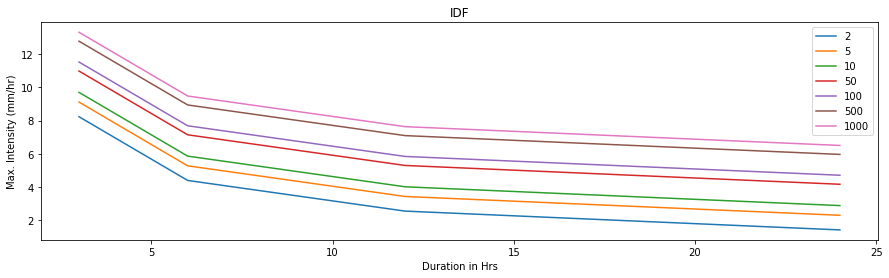

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for label, grp in result.groupby('RP'):
    grp.plot(x = "INT", y = 'XT',ax = ax, label = label, figsize = (15,4), 
             title = "IDF", xlabel = "Duration in Hrs", ylabel = "Max. Intensity (mm/hr)", )